<a href="https://colab.research.google.com/github/abhijit49/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corportaion (Apple Inc.) using the past 60 day stock price

In [61]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
# Define symbol and desired date range
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = datetime(2019,12,18)

# Retrieve historical data
df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Access data (example: closing prices)
closing_prices = df["Close"]

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.864151,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.032005,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,66.929573,133587600


In [68]:
#Get the number of rows and columns in the dataset
df.shape

(2002, 6)

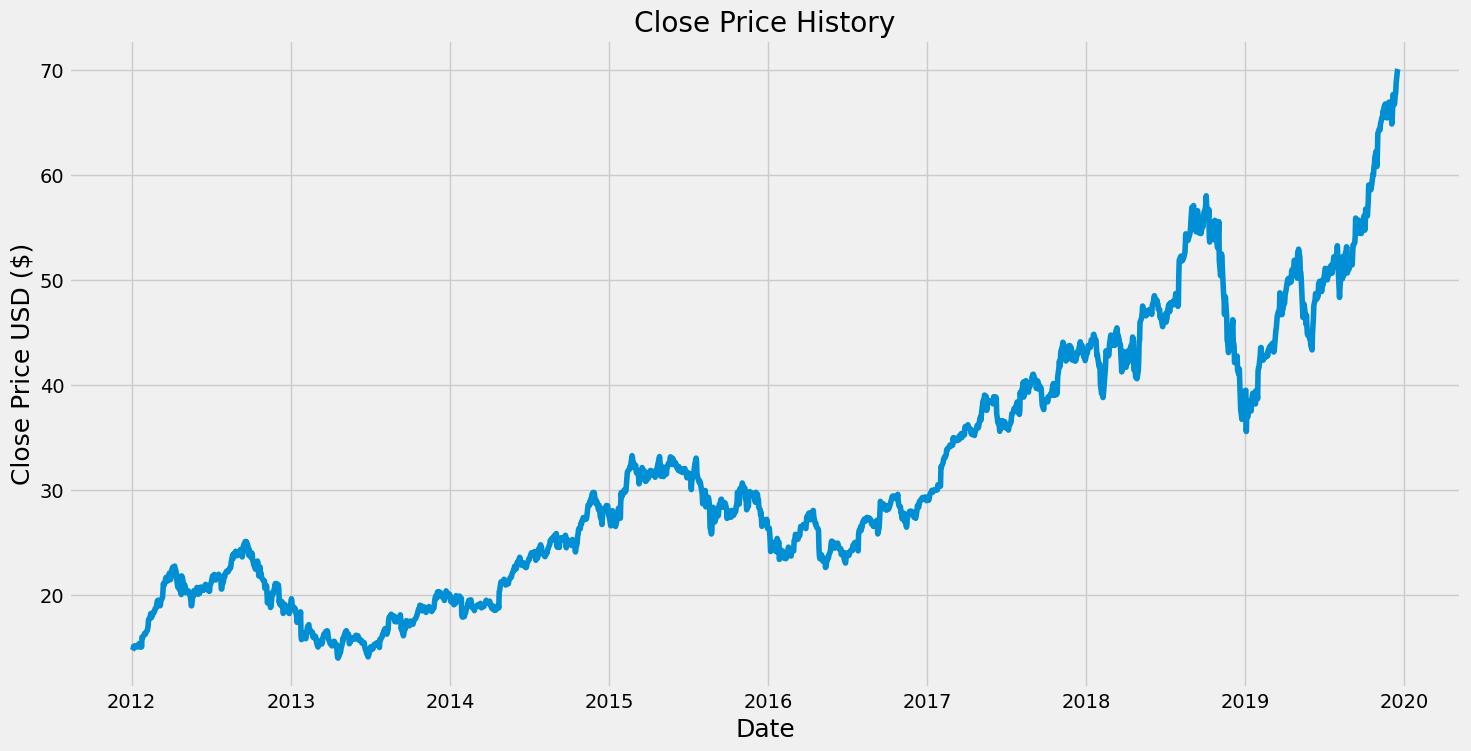

In [73]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [74]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [75]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [80]:
#Create the training dataset
#Create he scaled training dataset
train_data=  scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train
x_train = []  #independent training variables or training features
y_train = []  #dependent training variables or training features

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=62:
    print(x_train)
    print(y_train)
    print()


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [81]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [88]:
#Reshape the data in to 3D from 2D
x_train =  np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [92]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [94]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [97]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
#One epoch means that each sample in the training dataset
#has had an opportunity to update the internal model parameters.
#Generally, a number of 11 epochs is ideal for training on most datasets.

1543/1543 [==============================] - 59s 38ms/step - loss: 5.7572e-04


In [100]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the datasets x_test and y_tests
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [101]:
#Convert the data to a numpy array
x_test =np.array(x_test)

In [103]:
#Reshape the data
x_test =  np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [105]:
#Get the models predicted price values
predictions =  model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 0s 24ms/step


In [107]:
#Get the root mean squared error (RMSE)
rmse =np.sqrt( np.mean(predictions - y_test)**2 )
rmse

0.5937167739868164

<ipython-input-109-9fe5be920664>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


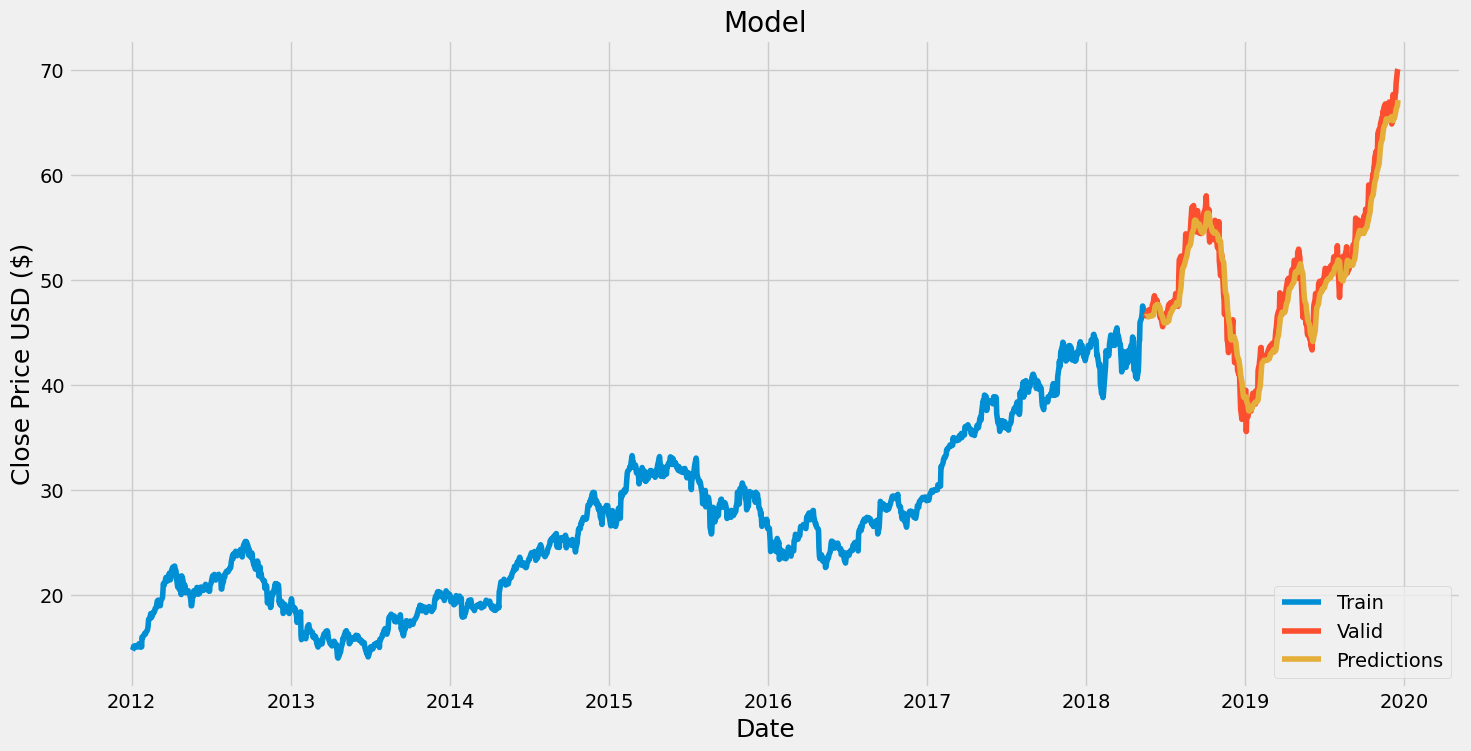

In [109]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid','Predictions'], loc='lower right')
plt.show()

In [110]:
#show the valid and the predicted price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.500301
2018-05-18,46.577499,46.528900
2018-05-21,46.907501,46.497002
2018-05-22,46.790001,46.488705
2018-05-23,47.090000,46.473919
...,...,...
2019-12-11,67.692497,65.786911
2019-12-12,67.864998,66.030121
2019-12-13,68.787498,66.284515


In [112]:
from re import X
#Get the quote
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = datetime(2019,12,18)

# Retrieve historical data
new_df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date).filter(['Close'])

#Get the last 60 day closing price values and convert the dateframe to an array
last_60_days =  new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to the X_test list
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test =  np.reshape((X_test, (X_test.shape[0],X_test[1], 1)))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[*********************100%%**********************]  1 of 1 completed


IndexError: index 1 is out of bounds for axis 0 with size 1

In [120]:
#Get the quote
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = datetime(2019,12,18)

# Retrieve historical data
new_df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date).filter(['Close'])

#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 47ms/step
[[67.66664]]


In [123]:
new_df = pdr.get_data_yahoo(symbol, start=datetime(2019,12,18), end=datetime(2019,12,19)).filter(['Close'])
print(new_df)

[*********************100%%**********************]  1 of 1 completed

                Close
Date                 
2019-12-18  69.934998


In [70]:
SPY = yf.download('AAPL', start='1995-1-1')
SPY

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,0.347098,0.347098,0.338170,0.342634,0.286800,103868800
1995-01-04,0.344866,0.353795,0.344866,0.351563,0.294274,158681600
1995-01-05,0.350446,0.351563,0.345982,0.347098,0.290536,73640000
1995-01-06,0.371652,0.385045,0.367188,0.375000,0.313892,1076622400
1995-01-09,0.371652,0.373884,0.366071,0.367885,0.307936,274086400
...,...,...,...,...,...,...
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700


In [24]:
data = web.DataReader("AAPL", data_source= "yahoo", start = datetime(2023,1,1), end = datetime(2024,3,10))

TypeError: string indices must be integers

In [53]:
import pandas as pd
from pandas_datareader import data as pdr

# Define symbol and desired date range
symbol = "RS"

today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2023,12,1)
end_date = today

# Retrieve historical data
df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

# Access data (example: closing prices)
closing_prices = df["Close"]

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-01,276.399994,280.329987,275.589996,278.910004,277.958008,287700
2023-12-04,277.320007,280.790009,276.579987,277.529999,276.582703,270900
2023-12-05,276.470001,276.470001,269.290009,269.670013,268.749573,293500
2023-12-06,269.329987,271.200012,265.399994,267.049988,266.138489,272600
2023-12-07,267.000000,267.630005,264.679993,267.630005,266.716522,178400
...,...,...,...,...,...,...
2024-03-04,322.079987,325.170013,320.779999,321.769989,320.671692,250900
2024-03-05,319.929993,322.519989,318.290009,320.260010,319.166870,185400
2024-03-06,325.079987,325.079987,319.959991,322.269989,321.169983,193400


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
